<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="750" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Tema:</b> Procesos aleatorios y componentes de una serie</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<img src='https://i.pinimg.com/originals/ba/78/85/ba788588817b74ef4713383ceac3e0ef.gif'>
<br>
<i>10/09/24</i>
</FONT>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
plt.style.use('ggplot')

### 1.Genere una muestra aleatoria de tamaño 1000 a partir de una distribución normal estándar. Visualice los datos como una serie de tiempo. ¿Verifique si se observa tendencia, comportamiento cíclico o estacional? Interprete los resultados.

In [2]:
np.random.seed(0)
data = np.random.randn(1000)

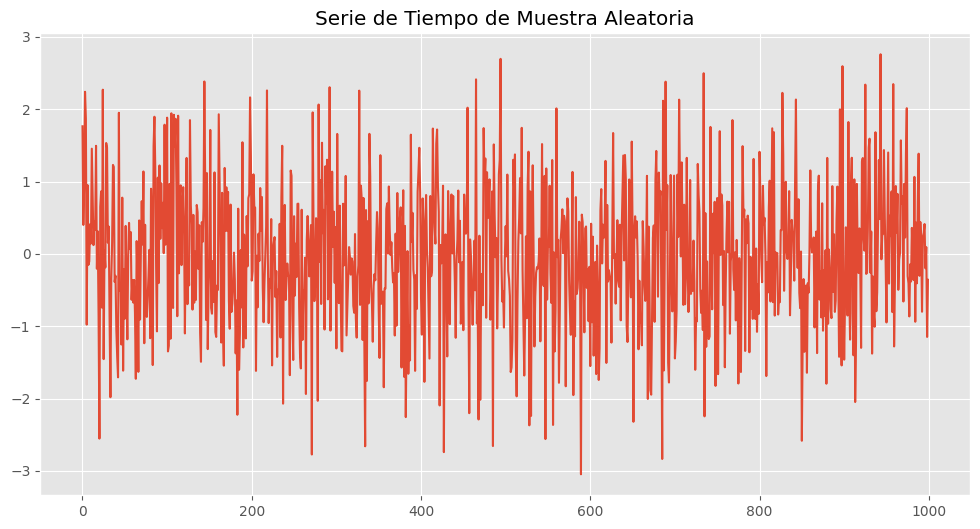

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Serie de Tiempo de Muestra Aleatoria')
plt.grid(True)
plt.show()

1. **Tendencia:** En la muestra aleatoria generada a partir de una distribución normal estándar, no se observa una tendencia clara en los datos, ya que están distribuidos aleatoriamente alrededor de la media (0 en este caso).

2. **Comportamiento Cíclico:** La distribución normal no presenta un comportamiento cíclico por sí misma.

3. **Estacionalidad:** Similar al comportamiento cíclico, la distribución normal estándar no tiene componentes estacionales.

La serie de tiempo parece ser ruido blanco, donde cada observación es independiente y sigue la misma distribución. Esto es consistente con una muestra aleatoria de una distribución normal estándar, donde no se esperan tendencias, ciclos ni estacionalidades.

### 2.Obtenga los valores de autocorrelación para los primeros 100 retrasos del punto anterior y visualice el diagrama de autocorrelación. Interprete los resultados.


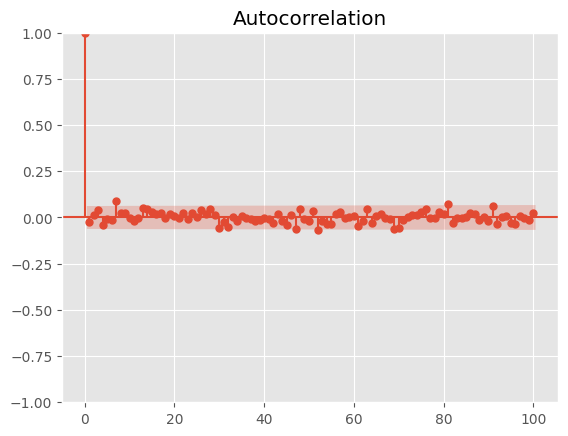

In [4]:
fig = tsaplots.plot_acf(data, lags = 100)
plt.show ()

**Valores de Autocorrelación para los Primeros 100 Retrasos**
1. **Retraso 0**: La autocorrelación en el retraso 0 es siempre 1, lo que indica una correlación perfecta con uno mismo.
  
2. **Retrasos 1 a 100**:
   - Para los retrasos de 1 a 100, las autocorrelaciones son cercanas a 0, lo que indica que no hay una correlación significativa entre los valores de la serie temporal separados por esos retrasos.
   - No se observa ningún patrón claro o tendencia en la autocorrelación para estos retrasos, lo que sugiere que la serie temporal podría ser ruido blanco o carecer de estructura temporal evidente.

**Interpretación**
- **Ruido Blanco**: La gráfica sugiere que la serie temporal es ruido blanco, ya que la mayoría de los valores de autocorrelación (para retrasos mayores que 0) son cercanos a 0. Esto significa que los valores en la serie no están correlacionados entre sí a través del tiempo, lo cual es típico en un proceso de ruido blanco.
  
- **No Estacionalidad**: La falta de picos significativos a retrasos específicos indica que no hay estacionalidad evidente en la serie temporal.

### 3.Explique desde el punto de vista estadístico en que consiste el ruido blanco (en particular el ruido blanco Gausiano). Defina con sus palabras que podemos considerar un proceso aleatorio en el contexto de las series de tiempo.

El ruido es una secuencia de variables aleatorias que cambian con el tiempo. El ruido blanco gaussiano es un caso particular de ruido blanco donde las muestras no solo son independientes entre sí, sino que también siguen un distribución normal.

Cada valor del proceso es independiente de los demás. Es decir, conocer un valor de la serie no proporciona información sobre los valores en los otros puntos. Esto se traduce en una función de autocorrelación que es 0 para todos los retrasos distintos de cero.

Las muestras del ruido gaussiano se distribuyen según la curva de distribución normal. Esto significa que la mayoría de valores se encuentran cerca de la media, que se cero en la mayoría de los casos, y la probabilidad de obtener valores extremos disminuye rápidamente a medida que se alejan de la media. En términos estadísticos, si 𝑋ₜ es una muestra del ruido blanco gaussiano, entonces 𝑋ₜ ~ 𝑁(𝜇,σ^2), donde 𝜇 es la media y σ^2 es la varianza.

Referencias: [Fernández R. V.](http://rstudio-pubs-static.s3.amazonaws.com/394452_eaa513348793474b9d21505e2429bb05.html), [Introducción](https://www.uco.es/users/ma1fegan/2015-2016/vision/Temas/ruido.pdf)

---

Un proceso aleatorio en el contexto de las series de tiempo se refiere a una secuencia de observaciones que se generan de manera impredecible. Cada punto de la serie representa un valor que no puede ser antecipado con precisión, aunque pueda seguir ciertos patrones o tendencias generales. En algunos casos, las observaciones pueden estar relacionadas entre sí, es decir, el valor de un momento dado puede depender del anterior a pesar de que son aleatorias.

### 4.Cargue en un dataframe el archivo aus_livestock.csv disponible en este repositorio. Filtre los valores relacionados a la cantidad de cerdos sacrificados en el estado de Victoria para las fechas posteriores al 2014. Divida cada valor de la serie por mil para cambiar la escala a miles y visualice los datos como una serie de tiempo.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/aus_livestock.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Month'] = pd.to_datetime(df['Month'], format = '%Y %b')
df.set_index('Month', inplace=True)

In [6]:
df.head()

,Animal,State,Count
Month,,,
1976-07-01,"Bulls, bullocks and steers",Australian Capital Territory,2300.0
1976-08-01,"Bulls, bullocks and steers",Australian Capital Territory,2100.0
1976-09-01,"Bulls, bullocks and steers",Australian Capital Territory,2100.0
1976-10-01,"Bulls, bullocks and steers",Australian Capital Territory,1900.0
1976-11-01,"Bulls, bullocks and steers",Australian Capital Territory,2100.0


In [7]:
df_filtered = df[(df['Animal'] == 'Pigs') & (df['State'] == 'Victoria') & (df.index > '2014')]
df_filtered['Count'] = df_filtered['Count'] / 1000

<ipython-input-7-91cfaf5febbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Count'] = df_filtered['Count'] / 1000


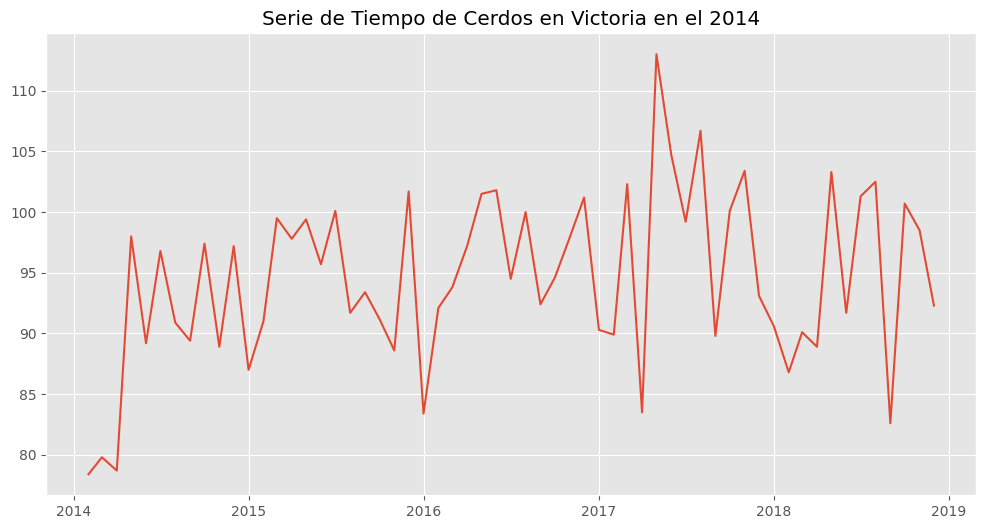

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Count'])
plt.title('Serie de Tiempo de Cerdos en Victoria en el 2014')
plt.grid(True)
plt.show()

### 5.Obtenga los valores de autocorrelación para los primeros 30 retrasos del punto anterior y visualice el diagrama de autocorrelación. ¿Es posible identificar tendencia y estacionalidad en el gráfico de autocorrelación? Interprete los resultados.

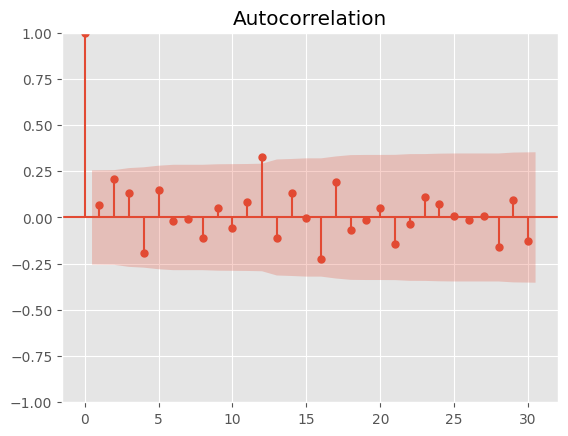

In [9]:
fig = tsaplots.plot_acf(df_filtered['Count'], lags = 30)
plt.show ()

1. **Tendencia**:
   La mayoría de las autocorrelaciones, excepto el primer lag, están cerca de cero y dentro de los límites de confianza (área sombreada en rojo). Esto indica que no parece haber una tendencia clara en los datos, ya que la autocorrelación no persiste significativamente en lags posteriores.

2. **Estacionalidad**:
   En este gráfico, no se observan patrones claros ni picos recurrentes en intervalos específicos, lo que sugiere la ausencia de estacionalidad fuerte en los datos.

El gráfico de autocorrelación sugiere que los datos no presentan ni tendencia significativa ni estacionalidad. La serie parece ser más aleatoria.

### 6.Consulte la diferencia entre la función de autocorrelación y la función de autocorrelación parcial. Explique qué ventajas y desventajas tienen cada una.

**Función de Autocorrelación (ACF)**

La ACF calcula la correlación entre los valores actuales de la serie y los valores pasados a diferentes intervalos de tiempo.

* **Ventajas de la ACF**

    * Permite visualizar la estructura de correlación a lo largo de varios rezasgos, ayudando a identificar patrones estacionales o cíclicos.

    * Es relativamente simple de calcular y de interpretar, lo que la hace accesible para analistas no especialistas.
* **Desventajas de la ACF**

    * La ACF considera todos los retrasos simultáneamente, lo que puede llevar a interpretaciones erróneas si hay interacciones complejas entre los retrasos.

**Función de Autocorrelación Parcial (PACF)**

La PACF, por otro lado, mide la correlación entre una serie y sus retrasos, eliminando la influencia de los rezasgos intermedios.

* **Ventajas de la PACF**

    * La PACF permite identificar la relación directa entre la serie y un rezasgo específico, lo que es crucial para la identificación de modelos autorregresivos.

* **Desventajas de la PACF**
    * El cálculo de la PACF puede ser más complejo que el de la ACF, especialmente en términos de interpretación, ya que requiere un entendimiento más profundo de la estructura de los datos.
    * Al centrarse en las relaciones directas, puede perder información sobre patrones de correlación más complejos que pueden estar presentes en la ACF.

Las dos funciones son complementarias y se usan en conjunto para el análisis de series temporales. La ACF es adecuada para una visión general de las dependencias en los datos, mientras que la PACF es crucial para la identificación precisa de modelos autorregresivos.


Referencias:
[Modelos de Series Temporales](https://www.ucm.es/data/cont/media/www/pag-41459/Series%20temporales%20Econometria%20Novales.pdf),
[IBM](https://www.ibm.com/docs/es/spss-modeler/saas?topic=data-autocorrelation-partial-autocorrelation-functions),
[ResearchGate](https://www.researchgate.net/figure/Funciones-de-autocorrelacion-y-autocorrelacion-parcial-de-la-serie_fig4_283169729)


### 7.Cargue en un dataframe el archivo aus_retail.csv disponible en este repositorio. Filtre los valores para los valores de “Food Retailing” en la columna “Industry”. Los datos presentan valores para varios estados en las mismas fechas. Sume los valores de la columna “Turnover” para todos los estados según la fecha y visualice el resultado como una serie de tiempo. ¿Analice la tendencia, la estacionalidad y la variación de la serie?

In [10]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/aus_retail.csv')
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2['Month'] = pd.to_datetime(df2['Month'], format = '%Y %b')
df2.set_index('Month', inplace=True)

In [11]:
df2_filtered = df2[df2['Industry'] == 'Food retailing']
df2_filtered = df2_filtered['Turnover'].groupby(df2_filtered.index).sum()

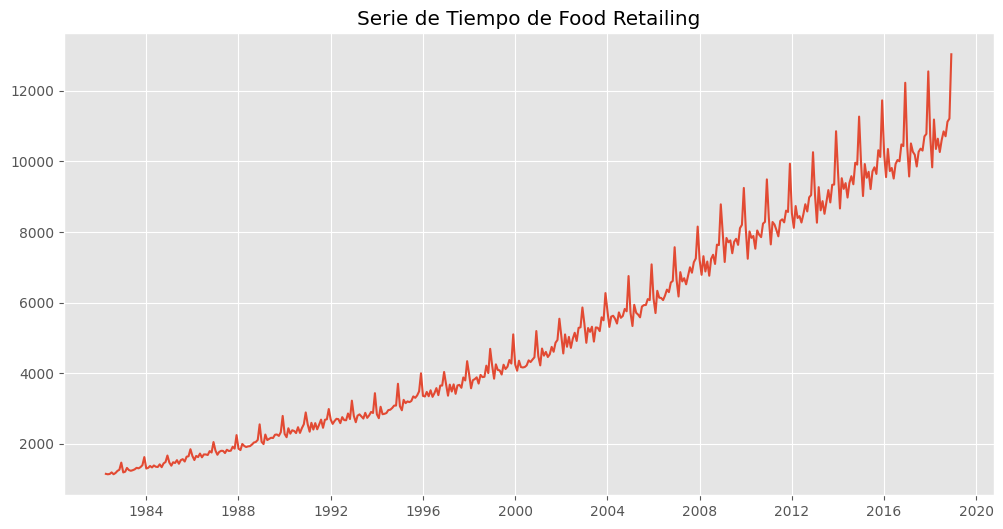

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df2_filtered)
plt.title('Serie de Tiempo de Food Retailing')
plt.grid(True)
plt.show()

1. **Tendencia**: La serie muestra una clara tendencia creciente a lo largo del tiempo desde el inicio de la serie en los años 1980 hasta aproximadamente 2020.El crecimiento no es lineal, sino que parece acelerarse en la última década (especialmente después de 2010). Esto podría deberse a factores como un aumento en el consumo, expansión del mercado o inflación.

    La tendencia ascendente puede estar impulsada por un crecimiento económico general, un aumento en la población, mayores ingresos disponibles o una mayor penetración del mercado por parte del sector de "Food Retailing".

2. **Estacionalidad**: Se observan picos y valles regulares en la serie, lo que indica la presencia de estacionalidad. Estos patrones son consistentes a lo largo de los años y sugieren fluctuaciones anuales en las ventas. La magnitud de la estacionalidad parece haber aumentado con el tiempo.
La estacionalidad sugiere que hay momentos del año en que las ventas aumentan de manera predecible, posiblemente debido a eventos como las festividades de fin de año, vacaciones, o promociones estacionales.

3. **Variación**: La mayor variabilidad en los datos recientes podría indicar que los eventos temporales (como promociones, cambios en el comportamiento del consumidor, o políticas económicas) están teniendo un mayor impacto en el volumen de ventas.  Conforme avanza el tiempo, no solo crece la serie, sino también la volatilidad. Esto se ve en la mayor dispersión y amplitud de los picos y valles en las últimas décadas.

### 8.Realice dos transformaciones sobre la serie obtenida en el punto anterior. La primera aplicando la función raíz cuadrada y la segunda aplicando la función logaritmo. ¿Qué cambios es posible observar en las series resultantes? ¿Qué ventajas tendría trabajar con los datos transformados?

In [13]:
df2_sqrt = np.sqrt(df2_filtered)
df2_log = np.log(df2_filtered)

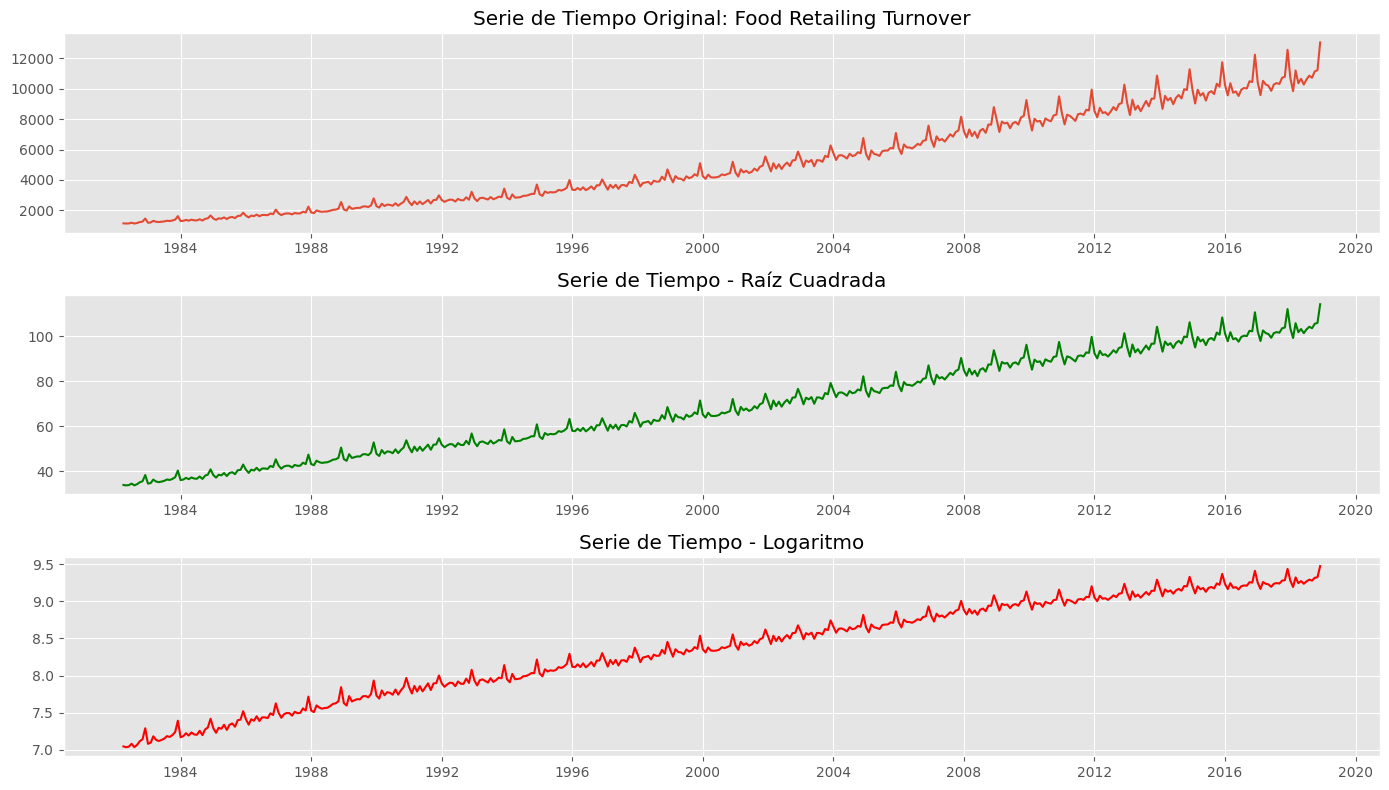

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(df2_filtered.index, df2_filtered)
plt.title('Serie de Tiempo Original: Food Retailing Turnover')
plt.grid(True)

# Raíz cuadrada
plt.subplot(3, 1, 2)
plt.plot(df2_sqrt.index, df2_sqrt, linestyle='-', color='g')
plt.title('Serie de Tiempo - Raíz Cuadrada')
plt.grid(True)

# Logaritmo
plt.subplot(3, 1, 3)
plt.plot(df2_log.index, df2_log, linestyle='-', color='r')
plt.title('Serie de Tiempo - Logaritmo')
plt.grid(True)

plt.tight_layout()
plt.show()

**Cambios Observados en las Series Transformadas**

1. **Serie Transformada con Raíz Cuadrada**:
   - La transformación de raíz cuadrada reduce la magnitud de los valores en la serie, especialmente aquellos valores altos. Esto se observa claramente en la gráfica donde los picos son menos pronunciados comparados con la serie original.
   - La serie transformada con raíz cuadrada parece más suave en comparación con la serie original, pero todavía mantiene cierta variabilidad y los patrones estacionales.
   - Los valores extremos (picos y valles) se suavizan, lo que ayuda a estabilizar la variabilidad.

2. **Serie Transformada con Logaritmo**:
   - La transformación logarítmica logra una suavización más pronunciada en comparación con la raíz cuadrada. La serie resultante muestra menos variabilidad, especialmente en los picos altos, que son significativamente reducidos.
   - La serie logarítmica parece mostrar una tendencia más lineal en lugar de una curva exponencial.
   - Los patrones estacionales son menos marcados en la serie logarítmica, lo que sugiere una atenuación de las fluctuaciones estacionales.

---

**Ventajas de Trabajar con los Datos Transformados**

1. **Estabilización de la Varianza**: Las transformaciones (especialmente el logaritmo) son útiles para estabilizar la varianza de la serie de tiempo. Esto es crucial cuando se trabaja con series en las que la variabilidad de la serie cambia con el tiempo.

2. **Mejora en el Modelado**: Los modelos lineales y otros modelos estadísticos suelen funcionar mejor cuando la serie es más estable y los picos están atenuados. La transformación logarítmica en particular es comúnmente utilizada para linealizar relaciones exponenciales, facilitando el ajuste de modelos predictivos.

3. **Reducción de la Influencia de los Valores Extremos**: Las transformaciones reducen el impacto de los valores extremos (outliers), lo que puede mejorar la precisión de los modelos al evitar que estos valores desproporcionados dominen los resultados.

Las transformaciones de raíz cuadrada y logaritmo permiten una mejor manejabilidad y análisis de la serie de tiempo al reducir la variabilidad y estabilizar la serie, lo que facilita tanto la interpretación como el modelado predictivo.

### 9.Cargue en un dataframe el archivo us_employment.csv disponible en este repositorio. Filtre los valores de la columna “Employed” para fechas superiores a 1990 y asociados con valores “Retail Trade” de la columna “Title”. Visualice los datos como una serie de tiempo.

In [15]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/us_employment.csv')
df3.drop(columns=['Unnamed: 0'], inplace=True)
df3['Month'] = pd.to_datetime(df3['Month'], format = '%Y %b')
df3.set_index('Month', inplace=True)

In [16]:
df3_filtered = df3[(df3['Title'] == 'Retail Trade') & (df3.index > '1990')]

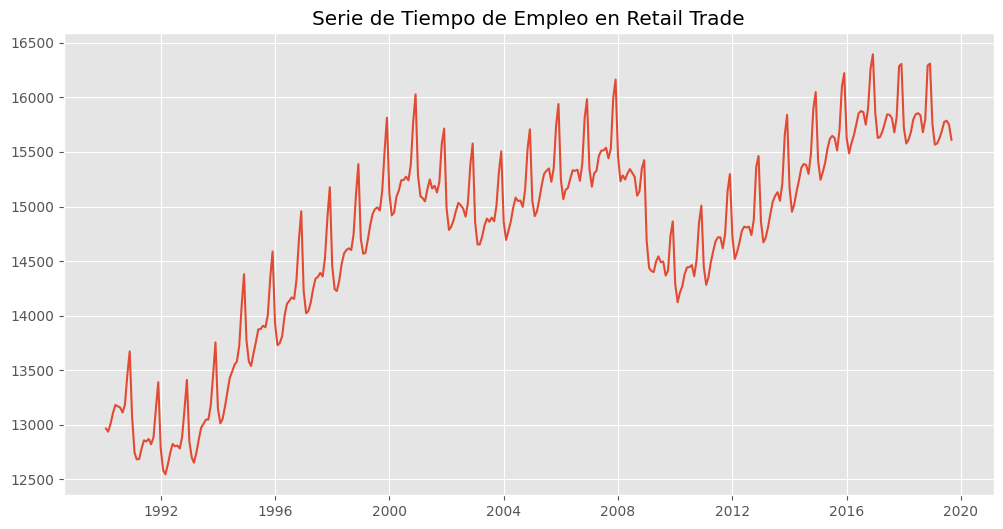

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df3_filtered['Employed'])
plt.title('Serie de Tiempo de Empleo en Retail Trade')
plt.grid(True)
plt.show()

### 10.A partir de la gráfica generada en el punto anterior, identifique la tendencia, el comportamiento cíclico y el comportamiento estacional. Realice esta tarea únicamente mediante inspección visual.

1. **Tendencia**: La serie muestra una **tendencia ascendente** general desde 1990 hasta alrededor de 2010. Sin embargo, a partir de 2010, la tendencia parece estabilizarse, con el empleo manteniéndose en un rango más estrecho, sin un aumento claro o significativo. La tendencia ascendente inicial indica un crecimiento sostenido en el empleo dentro del sector de comercio minorista durante este periodo.

2. **Comportamiento Cíclico**: Se observan varios ciclos a lo largo de la serie, con periodos de aumento y disminución que no están claramente alineados con patrones estacionales. Estos ciclos pueden estar relacionados con factores económicos más amplios, como recesiones o expansiones económicas.
   
    Por ejemplo, hay un ciclo notable de disminución en el empleo alrededor de los años 2008-2010, que coincide con la crisis financiera global.

3. **Comportamiento Estacional**: La serie muestra patrones estacionales claros y repetitivos. Estos patrones se manifiestan como picos y valles que ocurren de manera regular dentro de cada año o en periodos específicos.
    
     Estos picos estacionales son más prominentes en ciertos periodos, especialmente hacia finales de año, lo que podría estar asociado con el aumento del empleo temporal para atender la demanda en festividades y temporadas de compras como Navidad.

### 11.Consulte en que consiste la descomposición de una serie de tiempo. Explique en qué casos se puede utilizar la descomposición aditiva y cuando la multiplicativa. Presente un ejemplo de cada una. ¿Explique qué representan los residuos en la descomposición? ¿Cuál sería el comportamiento esperado?

La descomposición de una serie de tiempo es un método que permite separar una serie de datos temporales en sus componentes fundamentales: tendencia, estacionalidad, cíclico y ruido o irregularidad. Esta técnica facilita el análisis de patrones y la predicción futura al identificar y modelar cada uno de estos componentes.

**Tipos de Descomposición**

- **Descomposición Aditiva**

    En la descomposición aditiva, se asume que la serie de tiempo se puede expresar como la suma de sus componentes:

$$
Y_t = T_t + S_t + E_t
$$
-  
    donde $Y_t$ es el valor observado en el tiempo $t$, $T_t$ es la tendencia, $S_t$ es la estacionalidad, y $E_t$ es el error o residuo.
    
    Se utiliza cuando la estacionalidad y el ruido no varían significativamente en magnitud a lo largo del tiempo. Esto ocurre cuando los ciclos estacionales y las fluctuaciones son relativamente constantes a lo largo de los niveles de la tendencia.

    **Ejemplo de modelo aditivo:**
    Supongamos que estamos analizando el número de clientes en una tienda minorista que tiene una ligera tendencia creciente con un patrón estacional constante a lo largo del tiempo.

    La tienda recibe un promedio de 100 clientes al día durante la semana, con una estacionalidad de +20 clientes los sábados y -10 los lunes. Si hay una tendencia creciente de 5 clientes al mes, el número total de clientes puede representarse como la suma de la tendencia, la estacionalidad y el ruido.

    - Tendencia ($T_t$): 100 clientes con un incremento mensual de 5 clientes.
    - Estacionalidad ($S_t$): +20 el sábado y -10 el lunes, independientemente del nivel.
    - Residuos ($E_t$): fluctuaciones aleatorias.

- **Descomposición Multiplicativa**

    En la descomposición multiplicativa, la serie se expresa como el producto de sus componentes:

$$
Y_t = T_t \times S_t \times E_t
$$
-  
    Se utiliza cuando las fluctuaciones estacionales y el ruido aumentan o disminuyen proporcionalmente con el nivel de la tendencia. Es decir, la estacionalidad no es constante, sino que aumenta a medida que el nivel general de la serie aumenta.

    **Ejemplo de modelo multiplicativo:**
    Supongamos que estamos analizando el ingreso mensual de una empresa de ventas de productos electrónicos. En este caso, las ventas tienden a aumentar significativamente en épocas de vacaciones, como Navidad, pero el efecto estacional (el aumento en las ventas) es mayor cuando el negocio crece.

    Si la empresa tiene una tendencia de crecimiento mensual del 5%, las ventas durante Navidad podrían multiplicarse por 1.5. Así, cuanto mayores sean las ventas en un mes promedio, más grande será el efecto estacional durante las vacaciones.

    - Tendencia ($T_t$): crecimiento mensual del 5%.
    - Estacionalidad ($S_t$): el aumento de ventas en Navidad multiplica las ventas por 1.5.
    - Residuos ($E_t$): fluctuaciones aleatorias.
---
**Residuos en la Descomposición**

Los residuos o errores en la descomposición representan la parte de la serie que no se puede explicar por los componentes de tendencia, estacionalidad y cíclico. Estos residuos son importantes para evaluar la calidad del modelo, ya que un patrón aleatorio en los residuos sugiere que el modelo ha capturado adecuadamente la estructura de la serie de tiempo.

Se espera que los residuos sean aleatorios y no muestren patrones sistemáticos. Esto implica que no deberían ser predecibles y deberían tener una media cercana a cero. Si los residuos muestran patrones, esto indica que el modelo no ha capturado completamente la dinámica de la serie de tiempo, lo que puede llevar a errores en las predicciones futuras.

Referencias:
[Wordpress](https://seriesdetiempo.files.wordpress.com/2012/08/descomposicic3b3n-de-series-de-tiempo-base-cap-3-makridakis-et-al-fe-ago-2012.pdf),
[Ciencia de datos](https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html),
[Universidad Autónoma del Estado de México](http://ri.uaemex.mx/bitstream/handle/20.500.11799/108353/secme-6833_1.pdf?sequence=1)


### 12.Utilice la función seasonal_decompose() del módulo tsa de statmodels para realizar una descomposición aditiva de la serie obtenida en el punto cuatro. Visualice todos los componentes y compare los resultados con los obtenidos a través de la inspección visual. Verifique las escalas de cada una de las gráficas y explique la diferencia en los valores

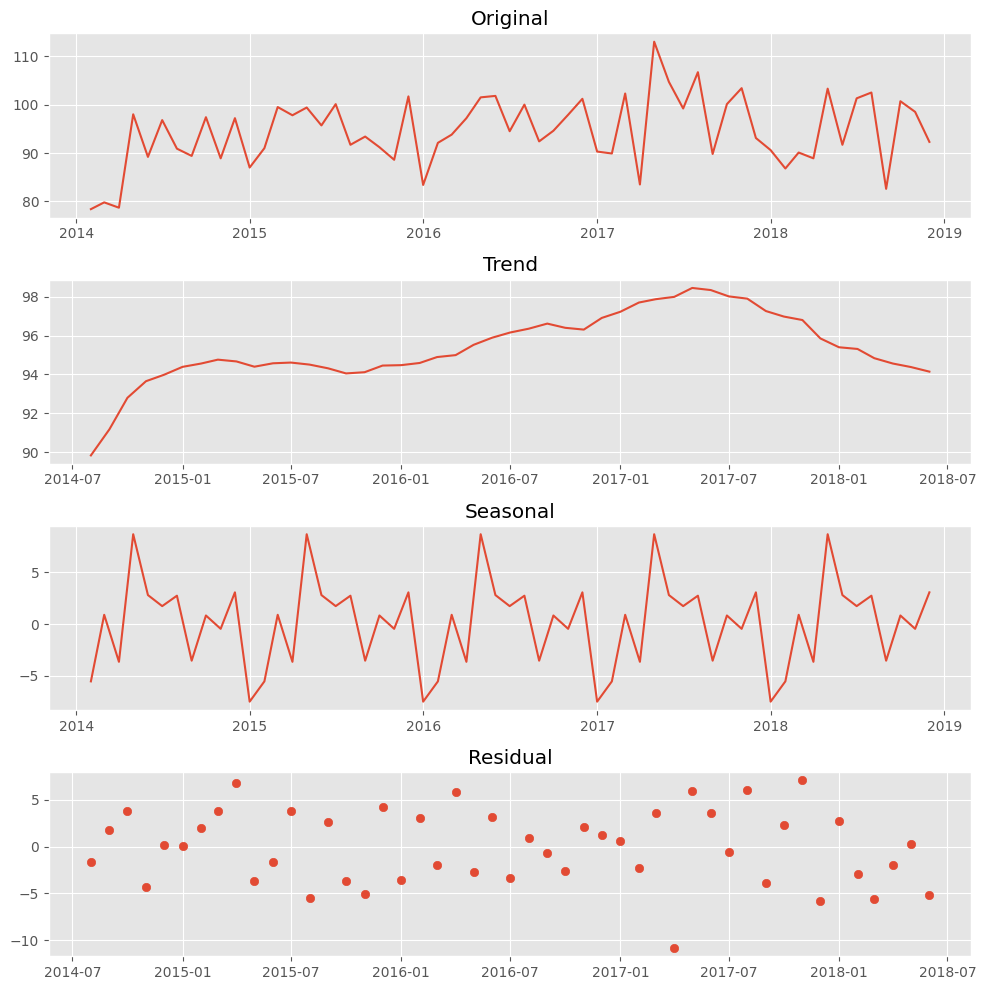

In [19]:
decomposition = seasonal_decompose(df_filtered['Count'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 10))

axes[0].plot(df_filtered['Count'])
axes[0].set_title('Original')

axes[1].plot(trend)
axes[1].set_title('Trend')

axes[2].plot(seasonal)
axes[2].set_title('Seasonal')

axes[3].scatter(df_filtered.index , residual)
axes[3].set_title('Residual')

fig.tight_layout()

**Primera Gráfica (Serie de Tiempo Completa)**
1. **Tendencia**: A simple vista, hay fluctuaciones considerables, con picos en varios momentos. No parece haber tendencia alguna.
2. **Estacionalidad**: Aparentemente, hay ciertos patrones repetitivos, aunque no es completamente claro en esta inspección visual.
3. **Ruido**: Existen variaciones que no parecen seguir un patrón claro, lo que puede ser interpretado como ruido.

**Segunda Gráfica (Descomposición)**

1. **Tendencia**: La segunda gráfica del descomposición muestra una tendencia creciente hasta aproximadamente 2016-2017, seguida de una caída suave.
2. **Estacionalidad**: El gráfico de estacionalidad muestra un patrón repetitivo regular con una amplitud pequeña (de alrededor de ±5 unidades). Esto indica que, aunque existe estacionalidad, su magnitud es menor comparada con la tendencia general.
3. **Residuos**: El gráfico de los residuos muestra valores alrededor de cero sin un patrón claro, lo que sugiere que el modelo capta bien la tendencia y estacionalidad, y el ruido es aleatorio.

---

**Diferencia en las Escalas:**

1. **Gráfica Original**: Los valores en la gráfica de la serie completa oscilan entre 80 y 110. Esta gráfica incluye todas las fluctuaciones sin separar componentes, por lo que muestra tanto la tendencia como la estacionalidad y el ruido en una escala más amplia.

2. **Descomposición**:
   - **Tendencia**: La tendencia es el componente de largo plazo que capta el comportamiento general de la serie a través del tiempo. Este componente suele tener la mayor magnitud de variación, ya que refleja el cambio general en los niveles de los datos. Por lo tanto, su escala es similar a la escala completa de la serie original.

   - **Estacionalidad**: La estacionalidad tiene una amplitud más pequeña, oscilando entre -5 y +5. La estacionalidad representa fluctuaciones repetitivas que ocurren en intervalos regulares de tiempo (por ejemplo, ciclos anuales). Estas variaciones son mucho menores en magnitud que la tendencia. La estacionalidad muestra cuán desviados están los valores de la serie de la tendencia en momentos específicos, pero no afecta el nivel general de la serie, por lo que la escala es mucho más pequeña.

   - **Residuos**: Los residuos son lo que queda después de eliminar tanto la tendencia como la estacionalidad de los datos originales. Los residuos reflejan variaciones aleatorias que no siguen un patrón específico. Al ser estas variaciones más pequeñas e impredecibles, los residuos tienen una escala mucho menor. Ya que el modelo de descomposición ajusta bien la serie, los residuos estan centrados en cero con poca variación.

